In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from scipy.stats import spearmanr
%matplotlib inline 
datos = pd.read_csv("SecuestrosColombia1970-2010.csv")
datos

,Día,Mes,Año,Departamento,Municipio,Lugar de Ocurrencia,Modalidad,Motivo Argumentado,Autor Presunto,Autor Confirmado,Exigencia,Tipo de Desenlace,Primera Fuente
0,7,2,1970,MAGDALENA,SANTA MARTA,Cabecera,Sobre una persona específica,Secuestro Económico,Delincuencia Común,.,Dinero,Liberado Tras Pago,Prensa
1,31,3,1970,META,VILLAVICENCIO,Cabecera,Sobre una persona específica,Secuestro Económico,Delincuencia Común,.,NaN,Liberado Tras Pago,Prensa
2,20,5,1970,CASANARE,YOPAL,NaN,NaN,NaN,.,.,NaN,NaN,Entrevistas
3,9,6,1970,CALDAS,MANIZALES,Resto,Sobre una persona específica,Secuestro Económico,Guerrilla-ELN,Guerrilla-ELN,Dinero,Liberado Tras Pago,Publicaciones
4,23,3,1971,QUINDIO,MONTENEGRO,Resto,Emboscada,Secuestro Económico,Otros,Otros,Dinero,Asesinado en Cautiverio,Sentencias
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39053,30,12,2010,ANTIOQUIA,MEDELLIN,NaN,NaN,NaN,.,.,NaN,NaN,Fiscalía
39054,30,12,2010,CORDOBA,MONTELIBANO,NaN,NaN,NaN,BACRIM,.,NaN,NaN,Fiscalía
39055,30,12,2010,CORDOBA,MONTELIBANO,NaN,NaN,NaN,BACRIM,.,NaN,NaN,Fiscalía
39056,30,12,2010,CORDOBA,MONTERIA,NaN,NaN,NaN,.,.,NaN,NaN,Fiscalía


In [2]:
datos.dtypes

Día                     int64
Mes                     int64
Año                     int64
Departamento           object
Municipio              object
Lugar de Ocurrencia    object
Modalidad              object
Motivo Argumentado     object
Autor Presunto         object
Autor Confirmado       object
Exigencia              object
Tipo de Desenlace      object
Primera Fuente         object
dtype: object

In [3]:
datos.shape

(39058, 13)

In [4]:
datos.isnull().sum()

Día                        0
Mes                        0
Año                        0
Departamento            1781
Municipio               1819
Lugar de Ocurrencia     8772
Modalidad               6318
Motivo Argumentado     20094
Autor Presunto             0
Autor Confirmado          57
Exigencia              21804
Tipo de Desenlace      10449
Primera Fuente            43
dtype: int64

In [5]:
# Eliminar las columnas
datos = datos.drop(["Lugar de Ocurrencia", "Motivo Argumentado", "Exigencia", "Tipo de Desenlace"], axis=1)

# se eliminan estas listas por la gran cantidad de datos faltantes, por ejemplo, en motivo argumentado falta
# más del 50% de los datos.

In [6]:
datos.isnull().sum()

Día                    0
Mes                    0
Año                    0
Departamento        1781
Municipio           1819
Modalidad           6318
Autor Presunto         0
Autor Confirmado      57
Primera Fuente        43
dtype: int64

In [7]:
#verificando la repetición de datos

datos.Departamento.unique()

array(['MAGDALENA', 'META', 'CASANARE', 'CALDAS', 'QUINDIO', 'SANTANDER',
       'BOGOTA D. C.', nan, 'TOLIMA', 'VALLE DEL CAUCA', 'ANTIOQUIA',
       'BOYACA', 'CAUCA', 'BOLIVAR', 'NARINO', 'CESAR', 'CORDOBA',
       'CUNDINAMARCA', 'HUILA', 'RISARALDA', 'LA GUAJIRA',
       'N. DE SANTANDER', 'CAQUETA', 'ATLANTICO', 'PUTUMAYO', 'VAUPES',
       'ARAUCA', 'GUAVIARE', 'SUCRE', 'VICHADA', 'CHOCO', ' ', 'GUAINIA',
       'AMAZONAS', 'SAN ANDRES'], dtype=object)

In [8]:
datos["Fecha"] = datos["Día"].astype(str) + "/" + datos["Mes "].astype(str) + "/" + datos["Año"].astype(str)
datos["Fecha"].dtype

dtype('O')

In [9]:
# dandole formate datetime 

datos["Fecha"]= pd.to_datetime(datos["Fecha"], format="%d/%m/%Y")
datos.Fecha.dtype

dtype('<M8[ns]')

In [10]:
datos.isnull().sum()

Día                    0
Mes                    0
Año                    0
Departamento        1781
Municipio           1819
Modalidad           6318
Autor Presunto         0
Autor Confirmado      57
Primera Fuente        43
Fecha                  0
dtype: int64

In [11]:
b = datos.loc[datos.Municipio.isnull(), ["Departamento","Municipio"]]
b.Departamento.notnull()

12       False
15       False
20       False
147      False
150      False
         ...  
38297    False
38302    False
38492     True
38714     True
38848     True
Name: Departamento, Length: 1819, dtype: bool

In [12]:
datos.dtypes

Día                          int64
Mes                          int64
Año                          int64
Departamento                object
Municipio                   object
Modalidad                   object
Autor Presunto              object
Autor Confirmado            object
Primera Fuente              object
Fecha               datetime64[ns]
dtype: object

## ¿Cuantos registros tiene la base de datos?

In [13]:

print("La base de datos tiene",datos.shape[1]," columnas y ",datos.shape[0],"observaciones")

La base de datos tiene 10  columnas y  39058 observaciones


¿Cuántos secuestros hay en la base de datos y cuántos de ellos tienen datos faltantes? Esto nos dará una idea de la calidad de la base de datos.

In [14]:
print("La base de dato presenta los siguientes datos faltantes \n", datos.isnull().sum())

La base de dato presenta los siguientes datos faltantes 
 Día                    0
Mes                    0
Año                    0
Departamento        1781
Municipio           1819
Modalidad           6318
Autor Presunto         0
Autor Confirmado      57
Primera Fuente        43
Fecha                  0
dtype: int64


# ¿Cuál es el rango de fechas de la base de datos? Esto nos permitirá ver si tenemos suficiente información a lo largo del tiempo para analizar patrones.

In [15]:
datos.Fecha.describe(datetime_is_numeric=True)


count                            39058
mean     2000-04-12 05:34:54.669465856
min                1970-02-07 00:00:00
25%                1997-11-20 00:00:00
50%                2000-10-19 00:00:00
75%                2003-12-26 00:00:00
max                2010-12-31 00:00:00
Name: Fecha, dtype: object

In [16]:
datos.dtypes

Día                          int64
Mes                          int64
Año                          int64
Departamento                object
Municipio                   object
Modalidad                   object
Autor Presunto              object
Autor Confirmado            object
Primera Fuente              object
Fecha               datetime64[ns]
dtype: object

# ¿Cuáles son los departamentos y municipios con mayor número de secuestros registrados? 

In [17]:
datos.groupby(["Departamento"]).Municipio.value_counts().sort_values(ascending=False).head(5)

Departamento     Municipio    
BOGOTA D. C.     BOGOTA D.C.      2576
ANTIOQUIA        MEDELLIN         1920
VALLE DEL CAUCA  CALI             1341
CESAR            VALLEDUPAR        737
META             VILLAVICENCIO     685
Name: Municipio, dtype: int64

In [18]:
datos.Departamento.value_counts().sort_values(ascending=False).head(5)

ANTIOQUIA          6898
VALLE DEL CAUCA    2729
CESAR              2622
BOGOTA D. C.       2576
SANTANDER          2007
Name: Departamento, dtype: int64

In [19]:
datos.Municipio.value_counts().sort_values(ascending=False).head(5)

BOGOTA D.C.      2576
MEDELLIN         1920
CALI             1341
VALLEDUPAR        737
VILLAVICENCIO     685
Name: Municipio, dtype: int64

# ¿Cuál es la distribución de los secuestros a lo largo de los años?

In [20]:
dx = datos.loc[:].dropna()
dx = dx.replace(" ", np.nan).dropna(subset=["Modalidad"])
dx.shape

(31537, 10)

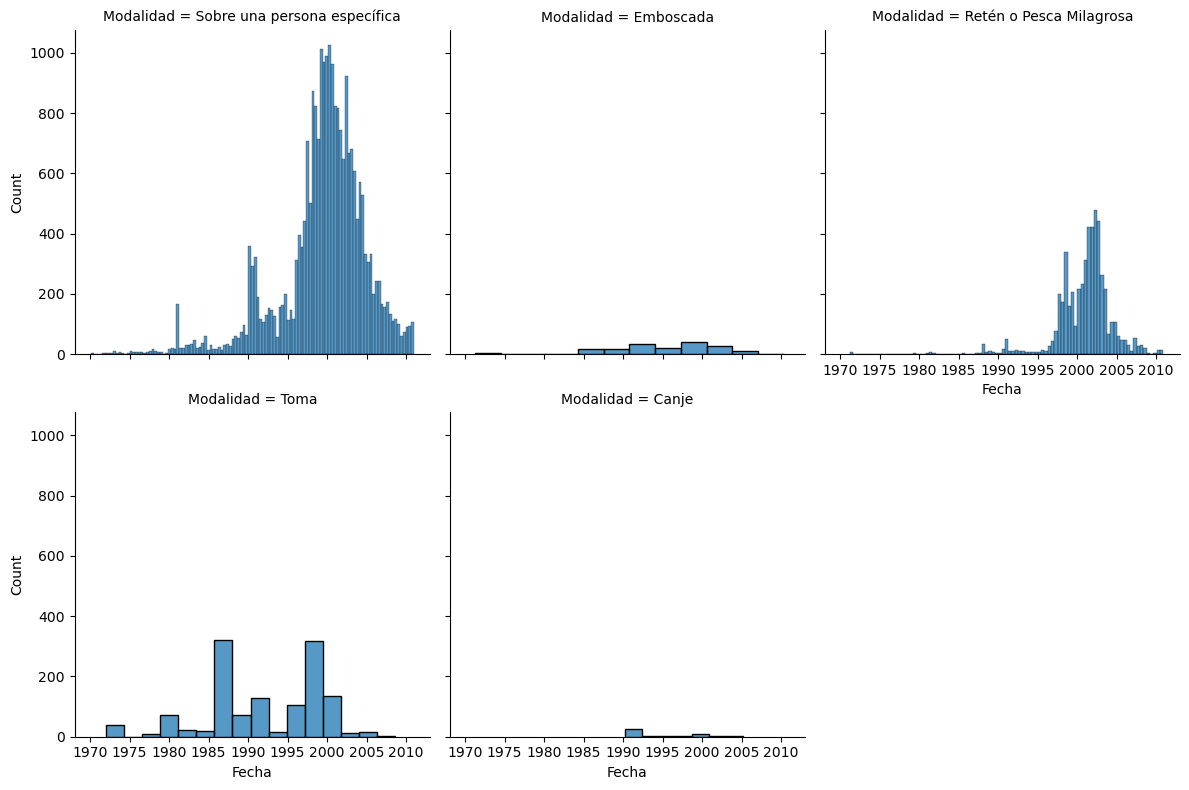

In [21]:
g = sns.FacetGrid(dx, col="Modalidad", col_wrap=3, height=4)
g.map(sns.histplot, "Fecha")


In [22]:
df = dx.groupby(["Departamento", "Modalidad"]).agg({"Modalidad": [np.size]})
df.columns = ["Cantidad"]
df.reset_index(inplace=True)

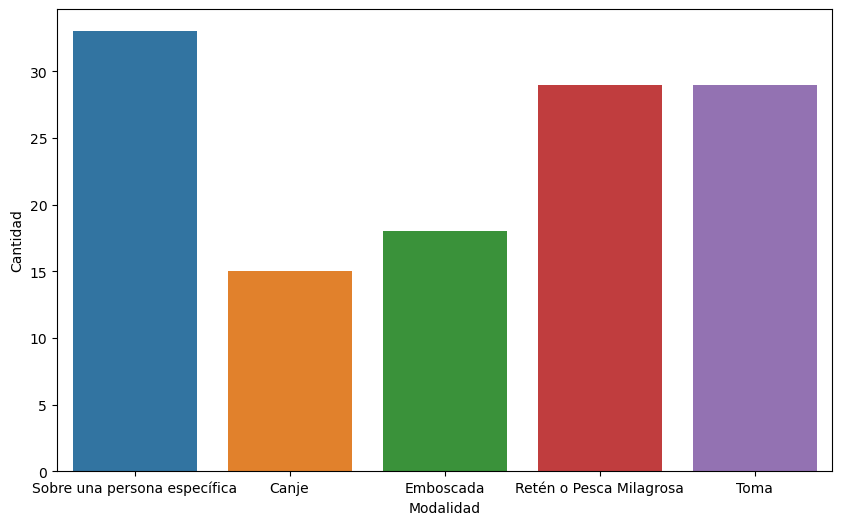

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.Modalidad.dropna())
plt.xlabel('Modalidad')
plt.ylabel('Cantidad')
plt.show()

<AxesSubplot:xlabel='Departamento', ylabel='count'>

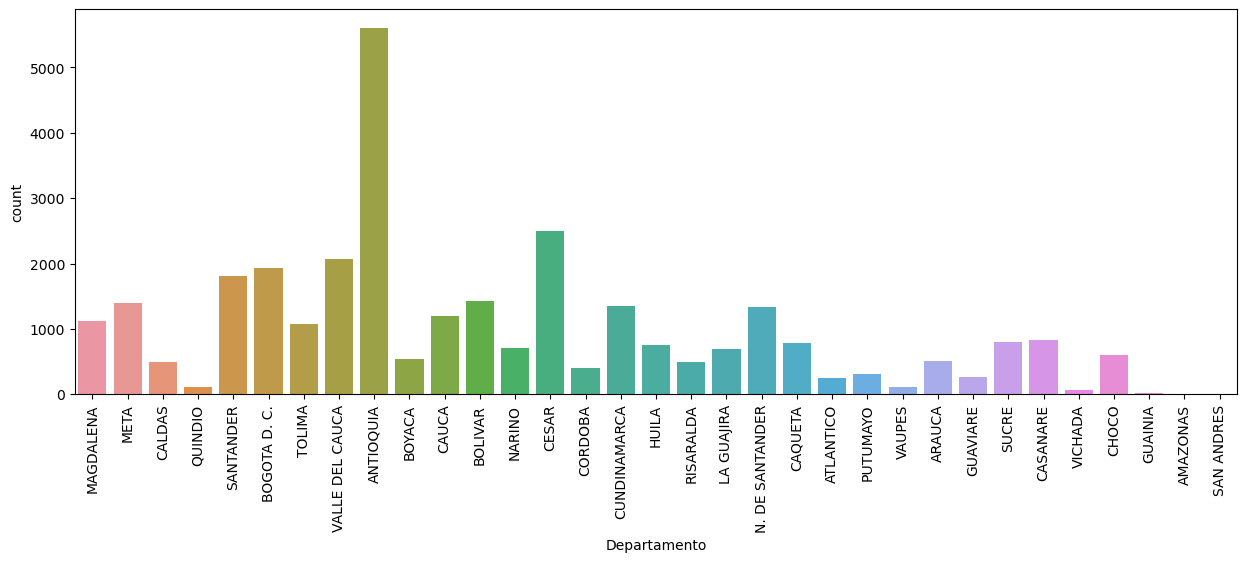

In [24]:
plt.figure(figsize= (15,5))
plt.xticks(rotation=90)

sns.countplot(x= dx.Departamento)


<AxesSubplot:xlabel='Fecha', ylabel='Count'>

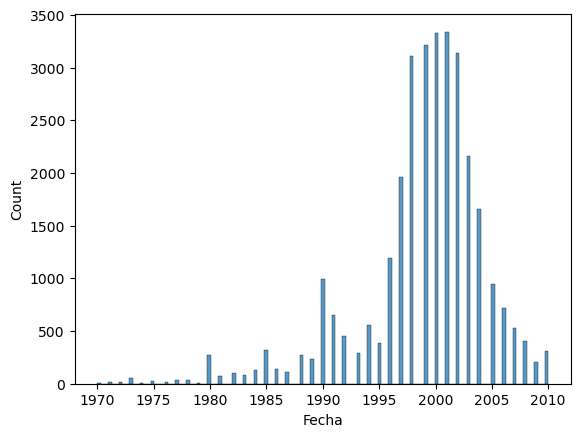

In [25]:
#df.groupby(df['Fecha'].dt.year)['Modalidad'].count()
sns.histplot(x=dx.Fecha.dt.year)

In [26]:
dx = datos.dropna(subset=["Autor Presunto", "Autor Confirmado"]).copy()
dx["Autor Confirmado"] = dx["Autor Confirmado"].fillna("Desconocido")
dx["Autor Confirmado"] = dx["Autor Confirmado"].replace({".":"Desconocido"})
dx["Autor Confirmado"].value_counts()

# Los datos Nan se catalogan como desconocidos

Desconocido                       29975
Guerrilla-FARC                     3310
Guerrilla-ELN                      2719
Delincuencia Común                 1026
Delincuencia Organizada             625
Grupos Paramilitares                377
Otros                               266
Guerrilla-ERP                       175
Guerrilla-EPL                       131
Guerrilla No Identificada            61
Guerrilla Conjunta                   58
Guerrilla-M19                        38
Narcotraficantes                     38
Agentes de Estado-Policía            37
Guerrilla-Disidencia ELN             32
Comunidad                            30
Agentes de Estado-Ejército           19
Varios Autores                       17
Guerrilla-Disidencia FARC            15
Familiares                           12
Agentes de Estado-DAS                 9
Agentes o Exagentes del Estado        8
Guerrilla-Disidencia M19              7
Otros Grupos o Bandas                 6
BACRIM                                6


# ¿Hay una relación  entre los autores presuntos y confirmados de los incidentes reportados en el conjunto de datos? 



In [27]:
a = dx.groupby(["Autor Presunto"]).agg({"Autor Confirmado":[np.size] })
a = a.sort_values(by=[("Autor Confirmado", "size")], ascending=False)
a

,Autor Confirmado
,size
Autor Presunto,
.,9972
Guerrilla-FARC,9416
Guerrilla-ELN,7254
Delincuencia Común,6582
Grupos Paramilitares,2153
Delincuencia Organizada,924
Guerrilla-M19,555
Guerrilla No Identificada,328


In [28]:
dx["Autor Confirmado"].describe()

count           39001
unique             27
top       Desconocido
freq            29975
Name: Autor Confirmado, dtype: object

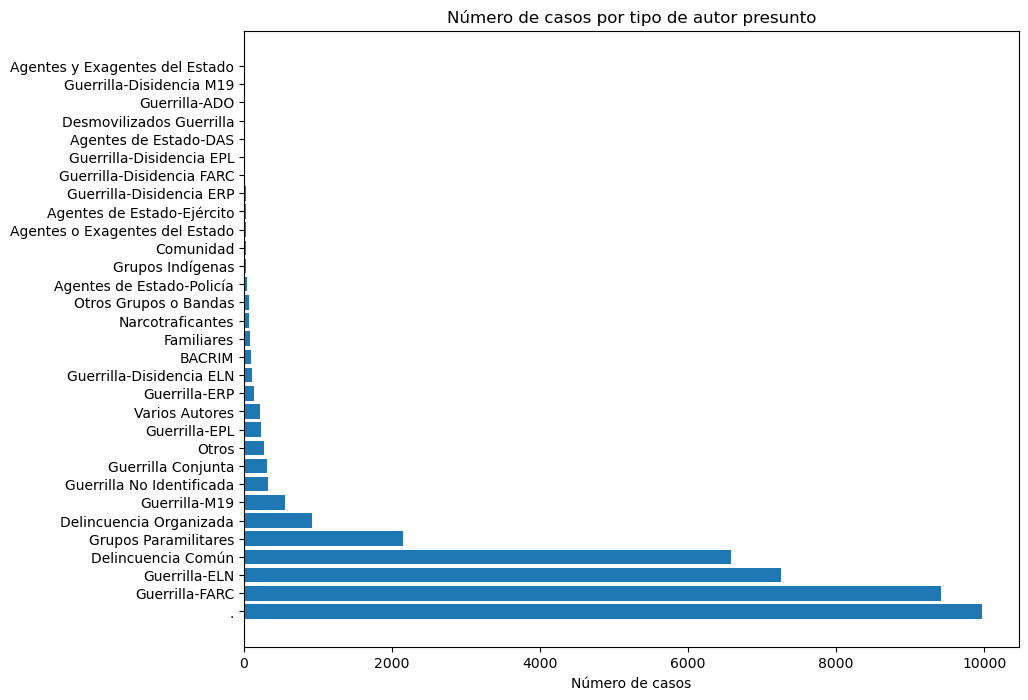

In [29]:
plt.figure(figsize=(10, 8))
plt.barh(a.index, a[("Autor Confirmado", "size")])
plt.title("Número de casos por tipo de autor presunto")
plt.xlabel("Número de casos")
plt.show()

# Definir las hipótesis nula y alternativa
+ H0 = "No hay diferencia significativa en la media de secuestros del periodo 2000 y 2005 al periodo 2006 y 2010"
+ Ha = "Hay al menos una diferencia significativa en el número de secuestros"
+ Confianza 95%

In [30]:
from scipy.stats import norm 

año = datos.Fecha.dt.year


std = año.std()
mean = año.mean()
n  = año.size
z = norm.ppf(0.5+(0.95/2))
# error estandar

e_rr = std/np.sqrt(n)

# estadistica z

stats_z = mean / e_rr
stats_z

# pvalue

pvalue = 2 * (norm.cdf(-abs(stats_z)))
pvalue

# intervalo 

intervalo = (
mean - (z * e_rr),
mean + (z * e_rr)
)
print(intervalo)

(1999.7258004887954, 1999.848729697082)


In [31]:
intervalo = norm.interval(confidence = 0.95, loc = mean, scale=e_rr)

intervalo 

(1999.7258004887954, 1999.848729697082)

In [32]:
dl = datos.Fecha.dt.year


dx = dl.groupby(dl).agg([np.size]).sort_values(by="size",ascending=False).reset_index()
dx.columns = ["Fecha","Cantidad"]

dx

,Fecha,Cantidad
0,2000,3547
1,2001,3545
2,1999,3354
3,2002,3306
4,1998,3278
5,2003,2303
6,1997,2100
7,2004,1773
8,2008,1455
9,2007,1384


In [81]:
# Definir las dos muestras a comparar
secuestros_2000_2005 = dx.loc[(dx["Fecha"] >= 2000) & (dx["Fecha"] <= 2005), ["Cantidad"]]
secuestros_2006_2010 = dx.loc[(dx["Fecha"] >= 2006) & (dx["Fecha"] <= 2010), ["Cantidad"]]

# Calcular la media y la desviación estándar de cada muestra
mean_2000_2005 = secuestros_2000_2005.mean()
std_2000_2005 = secuestros_2000_2005.std()
n1 = secuestros_2000_2005.size

mean_2006_2010 = secuestros_2006_2010.mean()
std_2006_2010 = secuestros_2006_2010.std()
n2 = secuestros_2006_2010.size

# err 
e_df_mean = np.sqrt(((n1 - 1) * std_2000_2005 ** 2 + (n2 - 1) * std_2006_2010 **2) / (n1 + n2 - 2)) * np.sqrt(1/n1 + 1/n2)

# Definir el nivel de significancia y el valor crítico correspondiente

zcritico = norm.ppf(0.50+(0.95/2))

# Calcular el valor del estadístico de prueba utilizando la fórmula z = (x1 - x2) / SE


ztest_ = (mean_2000_2005 - mean_2006_2010) / e_df_mean
ztest_
# Comparar el valor del estadístico de prueba con el valor crítico y tomar una decisión sobre la hipótesis nula

pvalue = 2 * (norm.cdf(-abs(ztest_)))
pvalue
print("ztest ",ztest_.values)
print("Pvalue",pvalue)

# intervalo

intervalos = (
(mean_2000_2005.values - mean_2006_2010.values) - (z * e_df_mean.values),
(mean_2000_2005.values - mean_2006_2010.values) + (z * e_df_mean.values)
)
print("intervalos", intervalos)

ztest  [2.90511224]
Pvalue [0.00367121]
intervalos (array([418.89651378]), array([2156.23681956]))


In [82]:
from statsmodels.stats.weightstats import ztest
pvalue = ztest(secuestros_2000_2005["Cantidad"], secuestros_2006_2010["Cantidad"])
# corroborando resultados
pvalue

(2.9051122407751815, 0.0036712142352196275)